In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from compass.core import WSI, wsi2hdf5
from pathlib import Path
from pprint import pprint

In [3]:
# wsi_path = "/home/vlad/Projects/tmp/wsi/SB001-T01-01-HE.mrxs"
# dst_path = "/home/vlad/Projects/tmp/wsi/SB001-T01-01-HE.h5"
wsi_path = "/home/vlad/Projects/tmp/wsi/36394.svs"
dst_path = "/home/vlad/Projects/tmp/wsi/36394.h5"

In [4]:
wsi_obj = WSI(wsi_path)
pprint(wsi_obj.info)

{'background': 255,
 'height': 25642,
 'magnification_step': 4.0003877380493025,
 'mpp_x': 0.4916,
 'mpp_y': 0.4916,
 'n_levels': 3,
 'objective_power': 20.0,
 'roi': {},
 'width': 25895}


In [5]:
wsi2hdf5(wsi_path, dst_path, crop=True, downscale_factor=2, compression='lzf')

2026-01-05 13:28:30,102 - INFO - WSI2HDF5: 7 levels to generate (level 0 is just a copy)
2026-01-05 13:28:30,103 - INFO - WSI2HDF5: Copy base level...
2026-01-05 13:28:30,121 - INFO - VIPS: vips__open_image_write: simple open
2026-01-05 13:28:35,552 - INFO - VIPS: threadpool completed with 5 workers
2026-01-05 13:28:35,580 - INFO - WSI2HDF5: ...OK
2026-01-05 13:28:35,581 - INFO - WSI2HDF5: Generating level 1...
2026-01-05 13:28:35,584 - INFO - VIPS: reducev: 13 point mask
2026-01-05 13:28:35,585 - INFO - VIPS: reducev: using vector path
2026-01-05 13:28:35,586 - INFO - VIPS: reduceh: 13 point mask
2026-01-05 13:28:35,587 - INFO - VIPS: reduceh: using vector path
2026-01-05 13:28:35,590 - INFO - VIPS: vips__open_image_write: simple open
2026-01-05 13:28:36,697 - INFO - VIPS: threadpool completed with 2 workers
2026-01-05 13:28:36,699 - INFO - WSI2HDF5: ...OK
2026-01-05 13:28:36,702 - INFO - WSI2HDF5: Generating level 2...
2026-01-05 13:28:36,705 - INFO - VIPS: reducev: 13 point mask
202

In [5]:
import matplotlib.pyplot as plt
from compass.core import MRI

In [6]:
img = MRI(dst_path)

In [7]:
img._info

{'base_mag_step': np.int64(2),
 'base_mpp': np.float64(0.4916),
 'base_objective_power': np.float64(20.0),
 'compass_version': np.float64(1.0),
 'level_count': np.int64(7),
 'numpy_ordering': np.int64(1)}

In [8]:
pprint(
    [d for d in zip(img.widths, img.heights)]
)

[(np.int64(25895), np.int64(25642)),
 (np.int64(12948), np.int64(12821)),
 (np.int64(6474), np.int64(6411)),
 (np.int64(3237), np.int64(3206)),
 (np.int64(1619), np.int64(1603)),
 (np.int64(810), np.int64(802)),
 (np.int64(405), np.int64(401))]


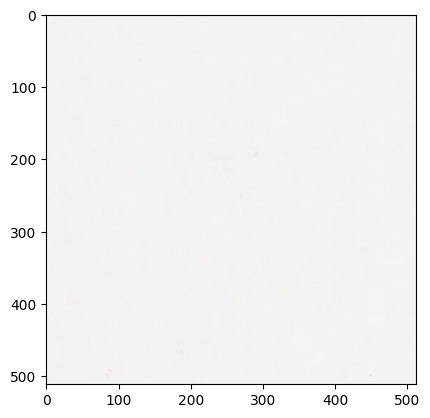

In [9]:
lv = 0
d = 256
patch = img.get_region_px(img.widths[lv]//2-d, img.heights[lv]//2-d, 2*d, 2*d, lv)
plt.imshow(patch)

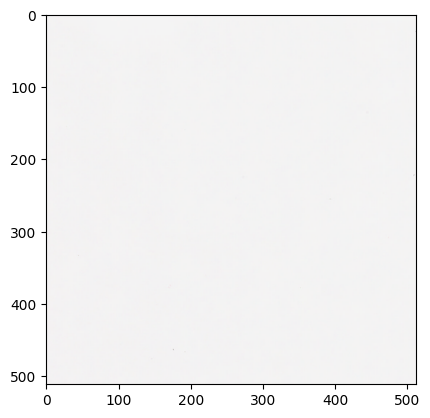

In [10]:
lv = 1
d = 256
patch = img.get_region_px(img.widths[lv]//2-d, img.heights[lv]//2-d, 2*d, 2*d, lv)
plt.imshow(patch)

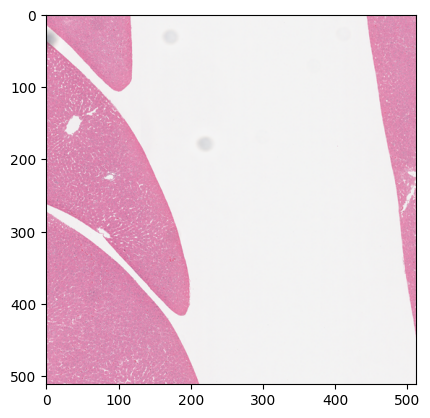

In [11]:
lv = 3
d = 256
patch = img.get_region_px(img.widths[lv]//2-d, img.heights[lv]//2-d, 2*d, 2*d, lv)
plt.imshow(patch)

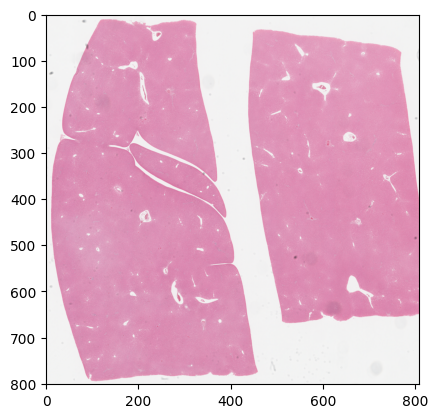

In [12]:
patch = img.get_plane(5)
plt.imshow(patch)